In [1]:
import os, math, subprocess
import pandas as pd
import numpy as np

get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

import seaborn as sns

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)
file_data = 'data.csv'

from scipy import stats

plt.style.use("seaborn")

In [2]:
def halfHeatMap(df, mirror=True):
    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        # show plot

In [3]:
df = pd.read_csv(file_data)
df.columns = ['Year', 'GDP', 'UPR']


df = df.apply(pd.to_numeric, errors='coerce')
df.head(20)

,Year,GDP,UPR
0,1980,27.847,NaN
1,1981,13.875,NaN
2,1982,18.405,NaN
3,1983,27.726,NaN
4,1984,48.177,NaN
5,1985,14.999,NaN
6,1986,33.873,NaN
7,1987,42.045,NaN
8,1988,23.234,NaN
9,1989,6.293,NaN


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
Year    39 non-null int64
GDP     39 non-null float64
UPR     29 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1016.0 bytes


,Year,GDP,UPR
count,39.0000,39.0000,29.0000
mean,1999.0000,67.7161,5.7034
std,11.4018,68.1957,2.8550
min,1980.0000,6.2930,2.1000
25%,1989.5000,22.0160,4.3000
50%,1999.0000,33.8730,5.6000
75%,2008.5000,99.9515,6.4000
max,2018.0000,241.2720,12.3000


<h1>1. Data Imputation:</h1>

With this data set, we can replace by zero/constant value or mean value. The advantages of this approach are fast, works well with small numerical datasets. But they 're not accurate. 

In [5]:
df_replace= df.copy()
df_replace["UPR_replace_by_0"] = df_replace["UPR"].fillna(0)

In [6]:
df_replace[5:15]

,Year,GDP,UPR,UPR_replace_by_0
5,1985,14.999,NaN,0.0
6,1986,33.873,NaN,0.0
7,1987,42.045,NaN,0.0
8,1988,23.234,NaN,0.0
9,1989,6.293,NaN,0.0
10,1990,6.472,12.3,12.3
11,1991,7.642,10.4,10.4
12,1992,9.867,11.0,11.0
13,1993,13.181,10.6,10.6
14,1994,16.312,10.3,10.3


In [7]:
df_replace["UPR_replace_by_mean"] = df_replace["UPR"].fillna(df_replace["UPR"].mean())

In [8]:
df_replace[5:15]

,Year,GDP,UPR,UPR_replace_by_0,UPR_replace_by_mean
5,1985,14.999,NaN,0.0,5.7034
6,1986,33.873,NaN,0.0,5.7034
7,1987,42.045,NaN,0.0,5.7034
8,1988,23.234,NaN,0.0,5.7034
9,1989,6.293,NaN,0.0,5.7034
10,1990,6.472,12.3,12.3,12.3000
11,1991,7.642,10.4,10.4,10.4000
12,1992,9.867,11.0,11.0,11.0000
13,1993,13.181,10.6,10.6,10.6000
14,1994,16.312,10.3,10.3,10.3000


Text(0, 0.5, 'Unemployment rate')

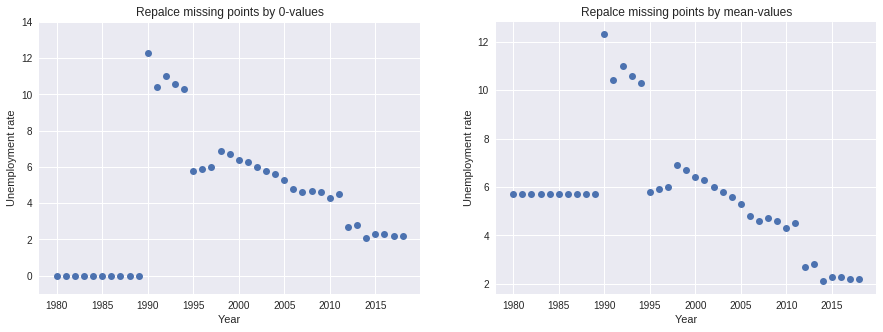

In [9]:
year = df_replace["Year"].values
UPR_replace_by_0 = df_replace["UPR_replace_by_0"].values
UPR_replace_by_mean = df_replace["UPR_replace_by_mean"].values

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(year, UPR_replace_by_0, 'o')
ax[0].set_title("Repalce missing points by 0-values")
ax[0].set_xlabel("Year")
ax[0].set_ylim(-1, 14)
ax[0].set_ylabel("Unemployment rate")

ax[1].plot(year, UPR_replace_by_mean, 'o')
ax[1].set_title("Repalce missing points by mean-values")
ax[1].set_xlabel("Year")
ax[0].set_ylim(-1, 14)
ax[1].set_ylabel("Unemployment rate")

Maybe they are wrong. In this proposal, we propose Okun's law, a model "observed relationship between unemployment and losses in a country's production". This model, parameter, errors and features will explain in the next section. They are:

- k, c
- GDP_annual_diff_rate
- GDP_diff

We will use the extrapolation method by "Okun's laws" to replace missing points.

In [10]:
(k, c) = (0.1308116527691924, -2.865579108434284)

In [11]:
df_exploding = df.copy()

# Tính different theo từng năm
df_exploding["GDP_diff"] = df_exploding["GDP"].diff()

# Chia cho giá trị của năm trước đó để tìm để tìm ra giá trị tăng trưởng thường niên
df_exploding["GDP_annual_diff_rate"] = df_exploding["GDP_diff"] / df_exploding["GDP"].shift(1)
df_exploding[:5]

,Year,GDP,UPR,GDP_diff,GDP_annual_diff_rate
0,1980,27.847,NaN,NaN,NaN
1,1981,13.875,NaN,-13.972,-0.5017
2,1982,18.405,NaN,4.530,0.3265
3,1983,27.726,NaN,9.321,0.5064
4,1984,48.177,NaN,20.451,0.7376


In [12]:
UPR = df_exploding["UPR"].values
GDP_annual_diff_rate = df_exploding["GDP_annual_diff_rate"].values

import math
# Get missing_point
missing_point = -1
for i in range(len(UPR)):
    if math.isnan(UPR[i]):
        missing_point =  i

UPR_okun= np.zeros(shape=(len(UPR),))

# Dự đoán trên phần data đã biết
UPR_okun[len(UPR) - 1] = UPR[len(UPR) - 1] 
for i in range(len(UPR) - 2, -1, -1):
    UPR_okun[i] = UPR[i + 1] + (GDP_annual_diff_rate[i + 1] - k) / c
    
# Dự đoán trên phần data chưa biết
for i in range(missing_point, -1, -1):
    UPR_okun[i] = UPR_okun[i + 1] + (GDP_annual_diff_rate[i + 1] - k) / c

In [13]:
df_replace["UPR_replace_by_Okun"] = UPR_okun

In [14]:
df_replace[0:15]

,Year,GDP,UPR,UPR_replace_by_0,UPR_replace_by_mean,UPR_replace_by_Okun
0,1980,27.847,NaN,0.0,5.7034,10.5837
1,1981,13.875,NaN,0.0,5.7034,10.3630
2,1982,18.405,NaN,0.0,5.7034,10.4313
3,1983,27.726,NaN,0.0,5.7034,10.5624
4,1984,48.177,NaN,0.0,5.7034,10.7741
5,1985,14.999,NaN,0.0,5.7034,10.4881
6,1986,33.873,NaN,0.0,5.7034,10.8816
7,1987,42.045,NaN,0.0,5.7034,10.9202
8,1988,23.234,NaN,0.0,5.7034,10.7184
9,1989,6.293,NaN,0.0,5.7034,10.4183


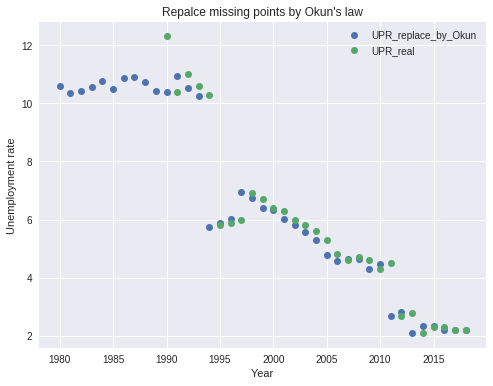

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.plot(year, df_replace["UPR_replace_by_Okun"].values, 'o', label='UPR_replace_by_Okun')
ax.plot(year, df_replace["UPR"].values, 'o', label='UPR_real')
ax.set_title("Repalce missing points by Okun's law")
ax.set_xlabel("Year")
# ax.set_ylim(-1, 14)
ax.set_ylabel("Unemployment rate")

ax.legend()

The Okun's law predicted "approximate values" of Unemployment rate each years. But in 1990s , the error is high. 

In [16]:
df_replace

,Year,GDP,UPR,UPR_replace_by_0,UPR_replace_by_mean,UPR_replace_by_Okun
0,1980,27.847,NaN,0.0,5.7034,10.5837
1,1981,13.875,NaN,0.0,5.7034,10.3630
2,1982,18.405,NaN,0.0,5.7034,10.4313
3,1983,27.726,NaN,0.0,5.7034,10.5624
4,1984,48.177,NaN,0.0,5.7034,10.7741
5,1985,14.999,NaN,0.0,5.7034,10.4881
6,1986,33.873,NaN,0.0,5.7034,10.8816
7,1987,42.045,NaN,0.0,5.7034,10.9202
8,1988,23.234,NaN,0.0,5.7034,10.7184
9,1989,6.293,NaN,0.0,5.7034,10.4183


<h1>2. Data Exploding: </h1>
Some statistical information of given dataset:
- GDP: 
    + Full value from 1980 to 2018 (39 values)
    + Mean of the GDP values: 67.7161 (Billions of U.S. dollars)
    + Standard deviation of the GDP values: 68.1957 (Billions of U.S. dollars)
    + Minimum of the GDP values: 6.293 (Billions of U.S. dollars)
    + Maximum of the GDP values: 241.272 (Billions of U.S. dollars)
    + Median of GDP values: 33.873 (Billions of U.S. dollars)

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/system-gru/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


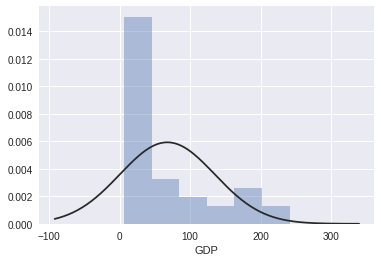

In [17]:
from scipy.stats import norm

sns.distplot(df["GDP"], fit=norm, kde=False)

- Unemployment rate (UPR): 
    + 10 missing values from 1980 to 1989
    + Have 29 values from 1990 to 2018
    + Mean of the UPR values: 5.7034 (%)
    + Standard deviation of the UPR values: 2.8550 (%)
    + Minimum of the UPR values: 2.1 (%)
    + Maximum of the UPR values: 12.3 (%)
    + Median of UPR values: 5.6 (%) in 2004

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/system-gru/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


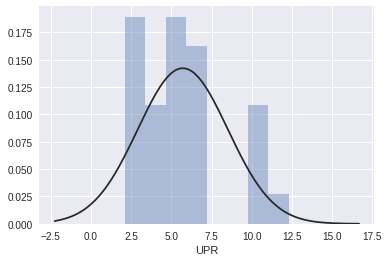

In [18]:
from scipy.stats import norm
sns.distplot(df["UPR"][missing_point + 1:], fit=norm, kde=False)

Correlation of features:

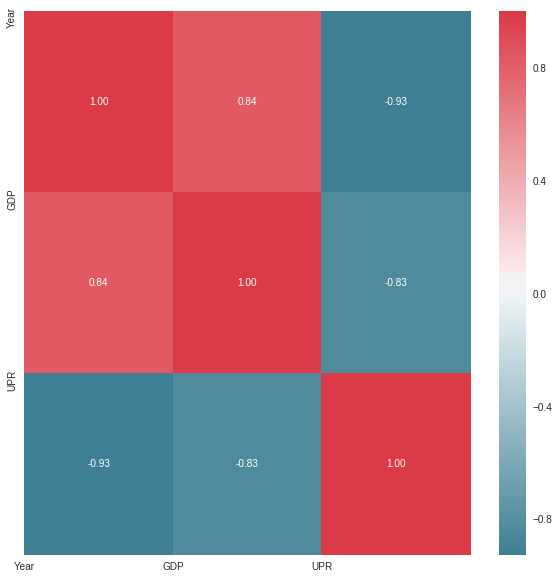

In [19]:
halfHeatMap(df)

Some analysis information of given dataset:
- GDP: Ranges from 6.293 (1989) to 241.272 (2018), with most values at the low end. The median is 33.8730.
- UPR: Ranges from 2.1 (2014) to 12.3 (1990).
- For every year, GDP decreases by about 5.6164 (Billions of U.S. dollars).
- For every year, Unemployment rate (UPR) decreases by about 0.3607.

<h3> a. Modeling GDP: </h3>

We used "Economic growth" model to model and forecast information about GDP by years: 

<img src="files/GDP_annual_rate.gif">

The result of this formula is "GDP_annual_diff_rate" feature in the previous section. "GDP_diff" is delta of GDP by years. This features will be used in the next pharse to estimate parameters for "Okun's law".

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


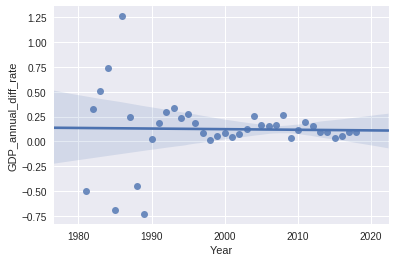

In [20]:
sns.regplot(x="Year", y="GDP_annual_diff_rate", data=df_exploding)

In [21]:
# Lấy phần data có thể quan sát được
x = df_exploding["Year"][10:]
y = df_exploding["GDP_annual_diff_rate"][10:]
slope_annual, intercept, _, _, std_err_annual = stats.linregress(x,y)

(slope_annual, std_err_annual)

(-0.003581027385350957, 0.0018870451675325633)

We also used "average growth in period" formula: 

<img src="files/GDP_period_rate.gif">

This formula will be used to calculate "GDP_period_diff_rate" feature.

In [22]:
gdp0 = df_exploding.at[0,'GDP']
df_exploding["GDP_period_diff_rate"] = (df_exploding["GDP"] / gdp0) ** (1 / df.index) -1 

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


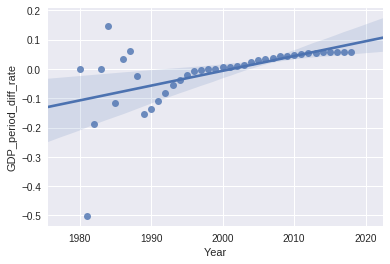

In [23]:
sns.regplot(x="Year", y="GDP_period_diff_rate", data=df_exploding)

<h3>b. Modeling Unemployment rate:</h3> 

The unemployment rate 'll be model by linear regression by years.

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


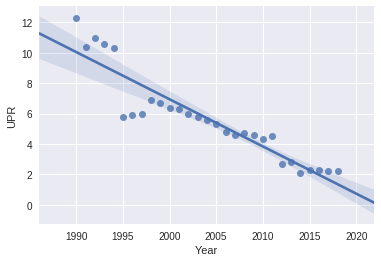

In [24]:
sns.regplot(x="Year", y="UPR", data=df_exploding)

In [25]:
# Lấy phần data có thể quan sát được
x = df_exploding["Year"][10:]
y = df_exploding["UPR"][10:]
slope_upr, intercept, _, _, std_err_upr = stats.linregress(x,y)

In [26]:
slope_upr, intercept, std_err_upr

(-0.31019704433497536, 627.3383251231527, 0.024499580683192322)

So, for every year, the unemployment rate decreases by about 0.31.

<h3>c. Modeling relationship of GDP and Unemployment rate: </h3>

In economics, Okun's law (named after Arthur Melvin Okun, who proposed the relationship in 1962) is an empirically observed relationship between unemployment and losses in a country's production. The "gap version" states that for every 1% increase in the unemployment rate, a country's GDP will be roughly an additional 2% lower than its potential GDP. The "difference version" describes the relationship between quarterly changes in unemployment and quarterly changes in real GDP. The stability and usefulness of the law has been disputed. Not to be confused with Lucas Wedge.

This 's the US's version of Okun's law:
<img src="files/Okun's_Law_2016.svg.png">

In our proposal, we use Okun's laws to describes the relationship between "years" changes in unemployment and "years" changes in real GDP with our data set.

We used linear regression to model "GDP_annual_diff_rate" and the unemployment rate.

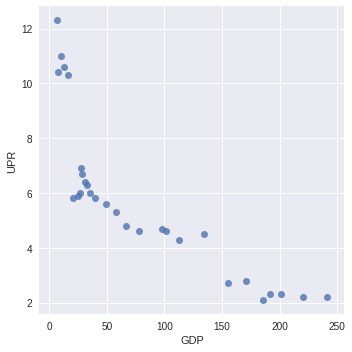

In [27]:
sns.lmplot(x="GDP", y="UPR", data=df, fit_reg=False)

When the unemployment rate decreases, the GDP increases

In [28]:
# Ta tính thêm tham số UPR_diff
df_exploding["UPR_diff"] = df_exploding["UPR"].diff()
# UPR diff được normal theo rate để có thể quan sát chung với GDP_annual_diff_rate
df_exploding["UPR_diff"] /= 100

In [29]:
df_exploding

,Year,GDP,UPR,GDP_diff,GDP_annual_diff_rate,GDP_period_diff_rate,UPR_diff
0,1980,27.847,NaN,NaN,NaN,0.0000,NaN
1,1981,13.875,NaN,-13.972,-0.5017,-0.5017,NaN
2,1982,18.405,NaN,4.530,0.3265,-0.1870,NaN
3,1983,27.726,NaN,9.321,0.5064,-0.0015,NaN
4,1984,48.177,NaN,20.451,0.7376,0.1469,NaN
5,1985,14.999,NaN,-33.178,-0.6887,-0.1164,NaN
6,1986,33.873,NaN,18.874,1.2584,0.0332,NaN
7,1987,42.045,NaN,8.172,0.2413,0.0606,NaN
8,1988,23.234,NaN,-18.811,-0.4474,-0.0224,NaN
9,1989,6.293,NaN,-16.941,-0.7291,-0.1523,NaN


/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


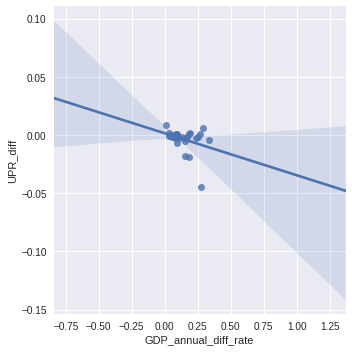

In [30]:
sns.lmplot(x="GDP_annual_diff_rate", y="UPR_diff", data=df_exploding)

In [31]:
slope, intercept, _, _, std_err = stats.linregress(
    df_exploding["UPR_diff"][11:], df_exploding["GDP_annual_diff_rate"][11:]
)

In [32]:
k = intercept
c = slope

(k, c, std_err)

(0.1308116527691924, -2.865579108434284, 1.655694837516535)

So for every increase of 1% of GDP growth rates, the unemployment rate decreases by about 2.865 (by year)

<h1>3. Feature Extraction: </h1>

 

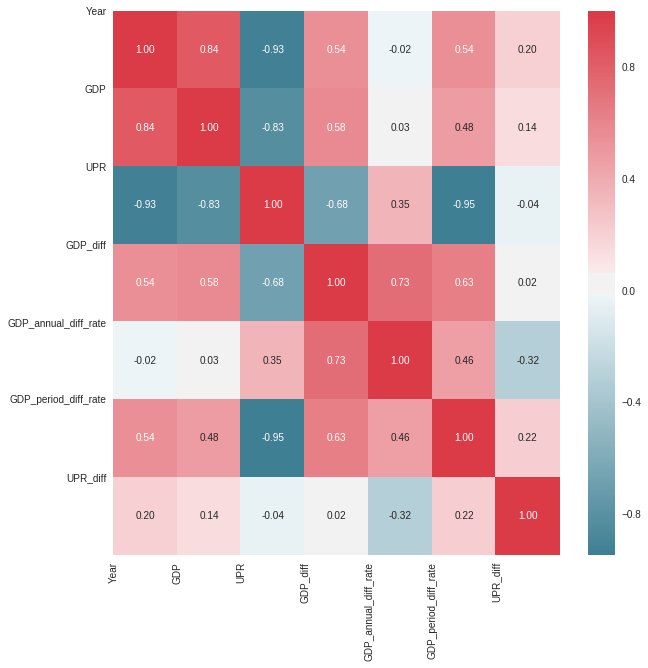

In [33]:
halfHeatMap(df_exploding)

<h3>a) GDP: </h3>

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period, often annually. In data set, GDP is millions of USD. We normalize GDP to the different of GDP by year (the growth rate for every year), so we had "GDP_annual_diff_rate" and it was used to predict Unemployment rate in "Missing Data Imputation" task. We also calculate "GDP_period_diff_rate" to model GDP growth rate by year. The correlation between GDP and Year and Unemployment rate  is high (0.84 and -0.83)

<h3>b) GDP_annual_diff_rate và GDP_period_diff_rate:</h3>

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


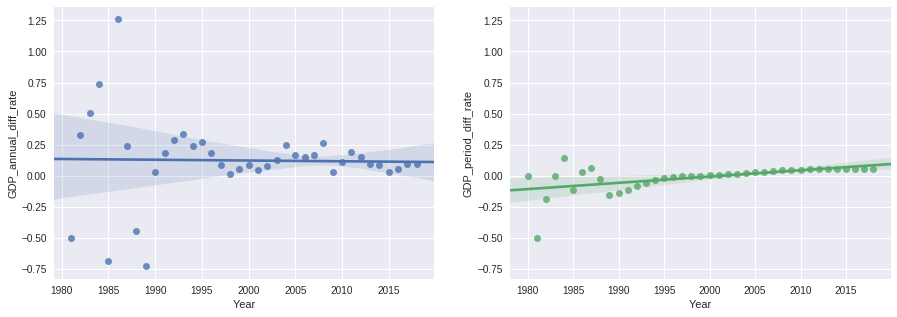

In [34]:
f = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharey = ax1)
sns.regplot(x="Year", y="GDP_annual_diff_rate", data=df_exploding, ax=ax1)
sns.regplot(x="Year", y="GDP_period_diff_rate", data=df_exploding, ax=ax2)

"GDP_annual_diff_rate" was used to predict Unemployment rate in "Missing Data Imputation" task, but for every year, the growth rate of GDP decreases

"GDP_period_diff_rate" predict the GDP of Vietname increases.

We hope Vietnam’s economic growth positive in 2019

<h3>c) UPR:</h3>
The unemployment rate is a measure of the prevalence of unemployment and it is calculated as a percentage by dividing the number of unemployed individuals by all individuals currently in the labor force. During periods of recession, an economy usually experiences a relatively high unemployment rate.

In this proposal, we replace the missing data of the unemployment rate.

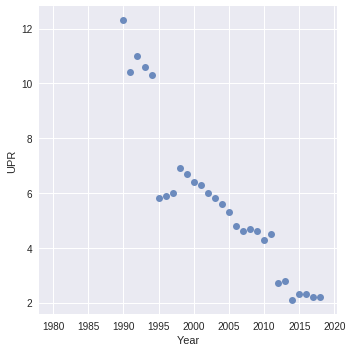

In [35]:
sns.lmplot(x="Year", y="UPR", data=df_exploding, fit_reg=False)

## References:
[1] https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779